# FDA Food Events Analysis

The FDA wants an analysis of all recorded adverse food events since 2004 in order to guide new organizational goals.   You are to perform data analysis and identify trends on the provided caers dataset. You are to present your findings and offer suggestions in a powerpoint presentation.

This data extract contains reports received by CAERS(Center for Food Safety and Applied Nutrition Adverse Event Reporting System) January 1, 2004 through March 31, 2022.

**Important Instructions**

---

In order to execute all cells with the run all command you must first upload the provided csv file. 

* Go to [Pepare](#scrollTo=pUa_zpKlUJ_8) 

* Run the [imports](#scrollTo=Xq7Z-cTUvA6S) and [data collection](#scrollTo=m8FSmZX3A6tW) cells. 

* After having run the imports cell, and uploaded the provided csv you can run all cells and skip to your problem of interest.


##Outline


###I.   [Ask](#scrollTo=wy2yhCZKYcAk&line=1&uniqifier=1)

The first phase in data analysis is to understand stakeholder expectations and clearly define the problem(s).

###II.  [Prepare](#scrollTo=pUa_zpKlUJ_8&line=1&uniqifier=1)

The second phase is to collect the data relevant to the problem of interest.

###III. [Process](#scrollTo=pUa_zpKlUJ_8&line=1&uniqifier=1)
 
The third phase is to find errors (such as inconsistencies and inaccuracies) in the data and to eliminate them so that our problem(s) may be answered truthfully.


###IV.  [Analyze](#scrollTo=zLmZW0qXYMAq&line=1&uniqifier=1)

The fourth phase is to find patterns, and relationships within the data that provide the required information for solving the problem(s) of interest.

###V.   [Share](#scrollTo=MOdpxARmYTKn&line=1&uniqifier=1)
The fifth phase is to share the findings.

###VI.  [Act](#scrollTo=y1F7Ar72YQzZ&line=1&uniqifier=1)
The sixth phase of the data is to provide recommendations to the relevant stakeholder(s) on how to solve the problem(s) of interest. 

# I. Ask

The project lead wants a report of the following metrics:
 
1. [Top 5 product types with most reactions](#scrollTo=uzJhv943wvAj&line=1&uniqifier=1)
 
2. [Top 5 ages with most cases](#scrollTo=BXmPGbtfaIGC&line=1&uniqifier=1)
 
3. [Cases per gender](#scrollTo=p7DcQO43p2tg&line=1&uniqifier=1)
 
4. [Top 5 most common case types](#scrollTo=dec8MjAUDp3O)
 
5. [Relationship between age and reactions](#scrollTo=czVQJwc_wJ7E)


## Data Glossary


**CAERS_CREATED_DATE:** The date on which the data were first entered into CAERS from an adverse event report.

**REPORT_ID:** The unique number that identifies each
case.

**DATE_EVENT:** The reported date on which the consumer
first experienced the adverse event.

**PRODUCT_TYPE:** Suspect or concomitant (as reported)

**PRODUCT:** The verbatim brands and/or product names indicated to have been used by the consumer reported to have experienced the adverse event. An adverse event report may specify consumption of a single product or multiple products.

**PRODUCT_CODE:** The FDA industry code associated with
the type of product reported.

**DESCRIPTION:** The FDA industry description associated
with the type of product reported. (ice
cream products, cosmetics, coffee/tea)

**PATIENT_AGE:** The age of the consumer reported to have experienced the adverse event.

**AGE_UNITS:** The time unit (day, week, month, year)
of the age provided in the Age at
Adverse Event data field for the
consumer reported to have experienced
the adverse event.

**SEX** The sex of the individual reported to have experienced the adverse event.

**CASE_MEDDRA_PREFERRED_TERMS:** The symptom(s) experienced by the injured consumer as specified by the reporter and coded by FDA according to the Medical Data Dictionary for Regulatory Activities (MedDRA).1 Each adverse event report may indicate one or more symptoms.

  * MedDRA® the Medical Dictionary for Regulatory Activities terminology is the international medical terminology developed under the auspices of the International Conference on Harmonization of Technical Requirements for Registration of Pharmaceuticals for Human Use (ICH) and used worldwide to classify adverse event symptoms.

**CASE_OUTCOME:** Outcome(s) of the adverse event experienced by the injured consumer as specified by the reporter; each report
may indicate one or more outcomes.

#II. Prepare

##Imports

In [1]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

## Data Collection / Ingestion

In [2]:
uploaded = files.upload()

Saving caers.csv to caers.csv


In [21]:
df = pd.read_csv(io.BytesIO(uploaded['caers.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#III. Process

##  Eploratory Data Analysis

In [15]:
df.head()

,REPORT_ID,DESCRIPTION,PATIENT_AGE,SEX,CASE_MEDDRA_PREFERRED_TERMS
0,65325,Bakery Prod/Dough/Mix/Icing,2.0,Female,"cough, dyspnoea, hospitalisation, rash, swelli..."
1,65345,Snack Food Item,10.0,Male,choking
2,65353,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,Female,"delusion, paranoia, physical examination"
3,65353,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,Female,"delusion, paranoia, physical examination"
4,65354,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Male,blood pressure increased


In [16]:
df.isnull().sum()

REPORT_ID                      0
DESCRIPTION                    0
PATIENT_AGE                    0
SEX                            0
CASE_MEDDRA_PREFERRED_TERMS    0
dtype: int64

In [17]:
df.dtypes

REPORT_ID                       object
DESCRIPTION                     object
PATIENT_AGE                    float64
SEX                             object
CASE_MEDDRA_PREFERRED_TERMS     object
dtype: object

In [18]:
df['SEX'].unique()

array(['Female', 'Male'], dtype=object)

##  Revist Questions and establish points of focus:

**Questions** 

1. Top 5 Products with the most cases

      **Relevant columns:** *PRODUCT, CASE_MEDDRA_PREFERRED_TERMS*

2. Top 5 ages with most cases

      **Relevant columns:** *PATIENT_AGE, AGE_UNITS, CASE_MEDDRA_PREFERRED_TERMS*
 
3. Cases per gender
      
      **Relevant columns:** *CASE_MEDDRA_PREFERRED_TERMS, SEX*
 
4. Top 5 most common case types

      **Relevant columns:** *CASE_MEDDRA_PREFERRED_TERMS*

5. Relationship between age and case count
      
      **Relevant columns** *PATIENT_AGE, CASE_MEDDRA_PREFERRED_TERMS*

## Data Cleaning

In [22]:
# Dropping the columns I won't be using for analysis
df.drop(['PRODUCT_TYPE', 'PRODUCT_CODE','DATE_EVENT','CAERS_CREATED_DATE','CASE_OUTCOME','PRODUCT'], axis = 1, inplace=True)

# Getting rid of null values
df.dropna(subset=['PATIENT_AGE','AGE_UNITS','SEX'],inplace=True)
 
# Getting rid of missing values in the gender column
df = df[df['SEX'].isin(['Unknown','Not Reported']) == False]
 
# Turning all reactions lowercase to prevent duplicates
df['CASE_MEDDRA_PREFERRED_TERMS'] = df['CASE_MEDDRA_PREFERRED_TERMS'].str.lower()
 
# Convert days to years for age by dividing by 356(365 days in one year)
df.loc[df.AGE_UNITS == 'day(s)', 'PATIENT_AGE'] = df['PATIENT_AGE']/365

# Convert weeks to years for age by dividing by 52.1786(52 weeks in one year)
df.loc[df.AGE_UNITS == 'week(s)', 'PATIENT_AGE'] = df['PATIENT_AGE']/52.1786

# Convert months to years for age by dividing by 12(12 months in one year)
df.loc[df.AGE_UNITS == 'months(s)', 'PATIENT_AGE'] = df['PATIENT_AGE']/12

# After having converted all the consumer_age rows to years I can delete the consumer_age_unit
df.drop(columns = 'AGE_UNITS' ,inplace=True)

# Reset the index to begin at 0 while maintaining row and row order
df.reset_index(inplace=True,drop=True)

# Round all the ages to get whole numbers 
df['PATIENT_AGE'] = df['PATIENT_AGE'].round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [23]:
df.head()

,REPORT_ID,DESCRIPTION,PATIENT_AGE,SEX,CASE_MEDDRA_PREFERRED_TERMS
0,65325,Bakery Prod/Dough/Mix/Icing,2.0,Female,"cough, dyspnoea, hospitalisation, rash, swelli..."
1,65345,Snack Food Item,10.0,Male,choking
2,65353,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,Female,"delusion, paranoia, physical examination"
3,65353,Vit/Min/Prot/Unconv Diet(Human/Animal),40.0,Female,"delusion, paranoia, physical examination"
4,65354,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Male,blood pressure increased


# IV. Analyse

## Top 5 product types with most cases

### Analyze

In [24]:
reactions_by_product_type = df.groupby(["DESCRIPTION"])['REPORT_ID'].count().sort_values(ascending=False).to_frame().reset_index(level=0)

###Visualize

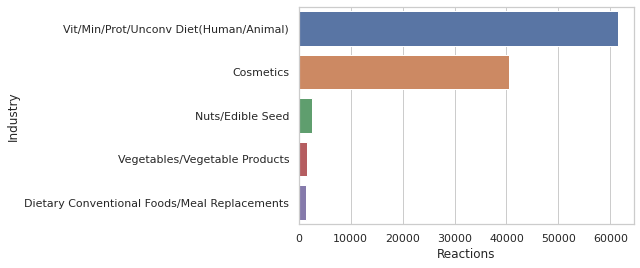

In [25]:
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data = reactions_by_product_type.head(5)
            ,y = 'DESCRIPTION'
            ,x = 'REPORT_ID'
            ,orient = "h"
            )
ax.set(xlabel='Reactions', ylabel='Industry')
plt.show()

## Top 5 ages with most cases

###Analyze

In [30]:
reactions_by_age = df.groupby(["PATIENT_AGE"])['REPORT_ID'].count().sort_values(ascending=False).to_frame().reset_index(level=0)

### Visualize

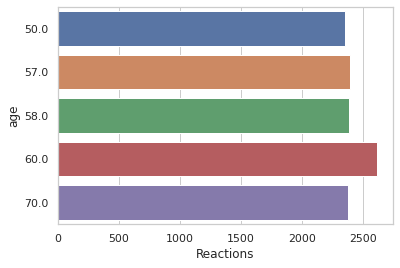

In [32]:
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data = reactions_by_age.head(5)
            ,y = 'PATIENT_AGE'
            ,x = 'REPORT_ID'
            ,orient = "h"
            )
ax.set(xlabel='Reactions', ylabel='age')
plt.show()

## Cases per gender

###Analyze

In [33]:
cases_by_gender = df.groupby(["SEX"])['REPORT_ID'].count().sort_values(ascending=False).to_frame().reset_index(level=0)

### Visualize

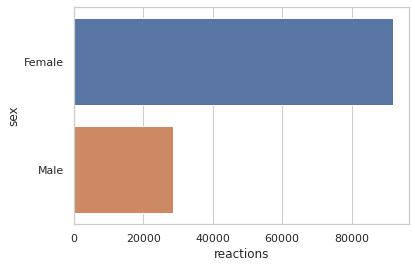

In [35]:
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data = cases_by_gender
            ,y = 'SEX'
            ,x = 'REPORT_ID'
            ,orient = "h"
            )
ax.set(xlabel='reactions', ylabel='sex')
plt.show()

## Top 5 most common case types

### Analyze

In [38]:
count_per_reaction = df.groupby(["CASE_MEDDRA_PREFERRED_TERMS"])['REPORT_ID'].count().sort_values(ascending=False).to_frame().reset_index(level=0)

### Visualize

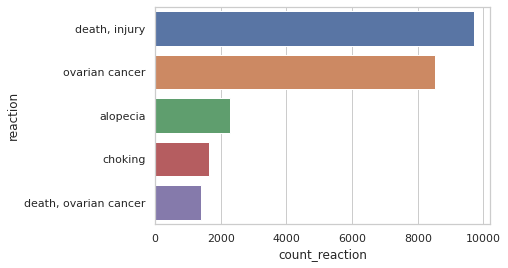

In [40]:
sns.set_theme(style = "whitegrid")
ax = sns.barplot(data = count_per_reaction.head(5)
            ,y = 'CASE_MEDDRA_PREFERRED_TERMS'
            ,x = 'REPORT_ID'
            ,orient = "h"
            )
ax.set(xlabel='count_reaction', ylabel='reaction')
plt.show()

## Relationship between age and case count


###Analyze

In [37]:
cases_vs_age = df.groupby(["PATIENT_AGE"])['REPORT_ID'].count().sort_values(ascending=False).to_frame().reset_index(level=0)

### Visualize


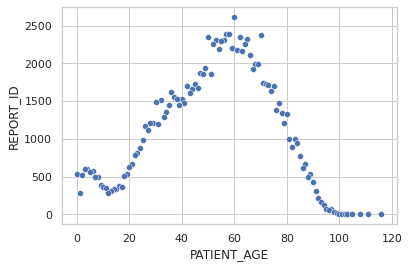

In [36]:
sns.scatterplot(data=reactions_by_age, x= "PATIENT_AGE", y="REPORT_ID")
plt.show()

#V. Share

https://docs.google.com/presentation/d/1NrSiGy-USafKMxSw9OfTPaHnFFTWyOlhimG5hcST70c/edit?usp=sharing

#VI. Act 

https://docs.google.com/presentation/d/1NrSiGy-USafKMxSw9OfTPaHnFFTWyOlhimG5hcST70c/edit?usp=sharing